Advanced Hypothesis Testing



This assignment aims to enhance proficiency in statistical analysis and hypothesis testing in Python utilizing real-world datasets to conduct hypothesis tests for paired data, multiple population means, and variance comparison, cultivating a deeper understanding of the statistical method's limitation and reliability through exploring assumptions, potential consequences of violating them, and their remedies.

Task 1: Paired Data Analysis

-Find a suitable dataset with paired data from a reliable source.

-Write a Jupyter notebook to import the dataset and perform a hypothesis test for paired data.

-Explain the problem, data, research question, and the appropriate statistical test that you would use to address the research question.

-Discuss the assumptions underlying the hypothesis test, potential consequences of violating these assumptions, and possible remedies.

-Propose a Python tool to assist with the interpretation of the results of the statistical test and visualizations.

=Record a 3- to 4-minute video explaining the analysis, results, and interpretation of the hypothesis test.

Task 2: Multiple Population Means Analysis

-Find a suitable dataset with more than two populations means from a reliable source.

-Continuing in the same Jupyter notebook, write a code to import the dataset and perform a hypothesis test for more than two population means.

-Explain the problem, data, research question, and the appropriate statistical test that you would use to address the research question.

-Discuss the assumptions underlying the hypothesis test, potential consequences of violating these assumptions, and possible remedies.

-Propose a Python tool to assist with the interpretation of the results of the statistical test and visualizations.

-Record a 3- to 4-minute video explaining the analysis, results, and interpretation of the hypothesis test.


Task 3: Variance Comparison Analysis

-Find a suitable dataset with two or more populations with variances to compare from a reliable source.

-Continuing in the same Jupyter notebook, write a code to import the dataset and perform a hypothesis test for variance comparison.

-Explain the problem, data, research question, and the appropriate statistical test that you would use to address the research question.

-Discuss the assumptions underlying the hypothesis test, potential consequences of violating these assumptions, and possible remedies.

-Propose a Python tool to assist with the interpretation of the results of the statistical test and visualizations.

-Record a 3- to 4-minute video explaining the analysis, results, and interpretation of the hypothesis test.

Resources
A/B test data. (n.d.). Www.kaggle.com. Retrieved March 31, 2024, from https://www.kaggle.com/datasets/sergylog/ab-test-data

Fast Food Marketing Campaign A\B Test. (n.d.). Www.kaggle.com. https://www.kaggle.com/datasets/chebotinaa/fast-food-marketing-campaign-ab-test


Mobile Games: A/B Testing. (n.d.). Www.kaggle.com. Retrieved March 31, 2024, from https://www.kaggle.com/datasets/yufengsui/mobile-games-ab-testing/data



Video Link:

Github link: https://github.com/FMJM401/DSC510-week-6/tree/main/Advanced%20Hypothesis%20Testing

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

Task 1: Paired Data Analysis

Problem: What is the output for the video game Cookie cats?

Research Question: Which type of test should be performed in orde ot figure out the result for the video game cookie cats?


Statical Approach: normailty and non parametic

In [38]:
mob = pd.read_csv('cookie_cats.csv')
mob.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [39]:
mob.shape

(90189, 5)

In [40]:
mob.duplicated().sum()

0

In [41]:
sms.DescrStatsW(mob["sum_gamerounds"]).tconfint_mean() # we checked confidience intervals before sampling

(50.599466713113756, 53.145446746399045)

In [42]:
sample = mob.sample(n=5000, random_state=42)

sample["sum_gamerounds"].mean()

51.9722

Hypothesis Testing

In [43]:
sample.groupby('version').agg({"sum_gamerounds": ["count", "mean"]})

sum_gamerounds           
                 count       mean
version                          
gate_30           2503  52.296444
gate_40           2497  51.647177

Normality Assumption

In [44]:
for gate in sample["version"].unique():
    
    s,p = shapiro(sample.loc[sample['version'] == gate,"sum_gamerounds"])
    
    print(f"Version: {gate} \nStatistic: {s:.3f}\np-Value: {p:.3f}\n")

Version: gate_30 
Statistic: 0.468
p-Value: 0.000

Version: gate_40 
Statistic: 0.494
p-Value: 0.000



Non - Parametic Test

In [45]:
s,p = mannwhitneyu(sample.loc[sample['version']=="gate_30","sum_gamerounds"],
             sample.loc[sample['version']=="gate_40","sum_gamerounds"])

print(f"\nStatistic: {s:.3f}\np-Value: {p:.3f}\n")


Statistic: 3120414.500
p-Value: 0.928



Task 2: Multiple Population Means Analysis

Problem: What are the test reults from the AB test?

Research Question: is the varienct controlled or regular?

Statical Approach: normailty and non parametic

In [12]:
df = pd.read_csv('AB_Test_Results.csv')
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
USER_ID,10000.0,4981.080200,2890.590115,2.0,2468.75,4962.0,7511.5,10000.00
REVENUE,10000.0,0.099447,2.318529,0.0,0.00,0.0,0.0,196.01


In [14]:
df.sort_values(by="REVENUE", ascending=False).head(15)

,USER_ID,VARIANT_NAME,REVENUE
1437,3342,control,196.01
6447,2881,variant,58.63
7642,7206,variant,57.46
9421,6792,control,41.53
8168,2166,control,29.32
9125,831,control,25.98
2482,7356,variant,23.04
6412,1053,control,20.07
5217,3684,variant,19.47
5530,282,control,18.56


In [15]:
df.duplicated().sum() # checked duplicated rows
df.drop_duplicates(inplace=True) # dropped duplicated rows

<Axes: xlabel='REVENUE', ylabel='Density'>

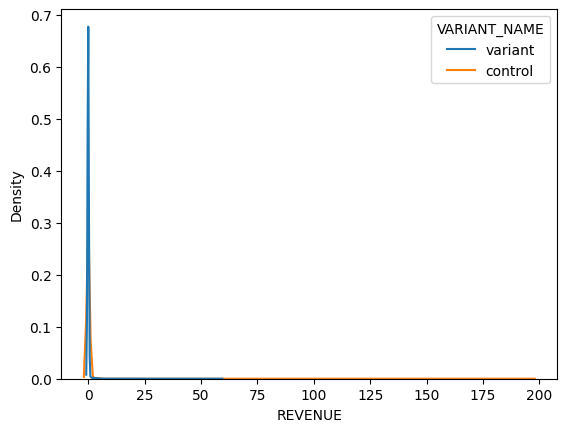

In [16]:
sns.kdeplot(x="REVENUE", data = df, hue = "VARIANT_NAME") # checked normall distribition

In [17]:
control = df[df["VARIANT_NAME"]=="control"]
variant = df[df["VARIANT_NAME"]=="variant"]

In [19]:
control.describe().T

,count,mean,std,min,25%,50%,75%,max
USER_ID,3973.0,4988.320664,2895.606855,2.0,2474.0,4971.0,7572.0,10000.00
REVENUE,3973.0,0.161842,3.367815,0.0,0.0,0.0,0.0,196.01


In [20]:
variant.describe().T

,count,mean,std,min,25%,50%,75%,max
USER_ID,3960.0,4965.412374,2889.255440,3.0,2442.75,4958.5,7425.0,10000.00
REVENUE,3960.0,0.088755,1.479239,0.0,0.00,0.0,0.0,58.63


Hypothesis Testing

In [23]:
control["REVENUE"].mean()

0.16184243644601057

In [24]:
variant["REVENUE"].mean()

0.08875505050505052

Normality Assumpiton

In [25]:
test_stat, pvalue = shapiro(control["REVENUE"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.0220, p-value = 0.0000


In [26]:
test_stat, pvalue = shapiro(variant["REVENUE"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.0327, p-value = 0.0000


Non - Parametic Test

In [28]:
test_stat, pvalue = mannwhitneyu(control["REVENUE"],variant["REVENUE"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 7882388.0000, p-value = 0.5129


Task 3: Variance Comparison Analysis

Problem: How would the marketing campagin results come out?

Research Question: how are the sales going for the fast food?

Statical Approach: comparing results 

In [32]:
fast_food = pd.read_csv('WA_Marketing-Campaign.csv')
fast_food.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [33]:
fast_food["Promotion"].value_counts()

Promotion
3    188
2    188
1    172
Name: count, dtype: int64

In [34]:
promotion1 = fast_food[fast_food["Promotion"]=="1"]
promotion2 = fast_food[fast_food["Promotion"]=="2"]
promotion3 = fast_food[fast_food["Promotion"]=="3"]

Normality Assumption

In [35]:
for group in list(fast_food["Promotion"].unique()):
    
    pvalue = shapiro(fast_food.loc[fast_food["Promotion"] == group, "SalesInThousands"])[1]
    
    print(group, 'p-value: %.4f' % pvalue)

3 p-value: 0.0000
2 p-value: 0.0000
1 p-value: 0.0000


Non-Parametic Test

In [36]:
s,p = kruskal(fast_food.loc[fast_food["Promotion"] == 1, "SalesInThousands"],
        fast_food.loc[fast_food["Promotion"] == 2, "SalesInThousands"],
        fast_food.loc[fast_food["Promotion"] == 3, "SalesInThousands"])
print(f"\nStatistic: {s:.3f}\np-Value: {p:.3f}\n")
# The p-value for the hypothesis of equality of promotions is less than 0.05; 
#therefore, we reject the null hypothesis, indicating that the assumption of equality is not satisfied


Statistic: 53.295
p-Value: 0.000



In [37]:
from statsmodels.stats.multicomp import MultiComparison

comparison = MultiComparison(fast_food['SalesInThousands'], fast_food['Promotion'])
tukey = comparison.tukeyhsd(0.05)

print(tukey.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------
